## CS105 Mini-Project
Worked in by:

**Kevin Chin, Muhammad Memon, Zain Ashraf, Zian Ibrahim**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("sample_data.csv")
cleaned_df = df.loc[:, ['What is your current class standing?', 'What is your gender?', 'Do you currently have a job?', 
                    'If you have a job, how much do you work per week?', 
                    'If you have a job, do you work on or off campus?', 
                    'What is your GPA?', 
                    'How satisfied are you with your current GPA?',
                    'How many classes are you taking this quarter?', 
                    'How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?']]
cleaned_df.loc[:, 'Do you currently have a job?'] = cleaned_df.loc[:, 'Do you currently have a job?'].fillna(0)
cleaned_df.loc[:, 'If you have a job, how much do you work per week?'] = cleaned_df.loc[:, 'If you have a job, how much do you work per week?'].fillna(0)
cleaned_df.loc[:, 'If you have a job, do you work on or off campus?'] = cleaned_df.loc[:, 'If you have a job, do you work on or off campus?'].fillna(0)
cleaned_df.head()

,What is your current class standing?,What is your gender?,Do you currently have a job?,"If you have a job, how much do you work per week?","If you have a job, do you work on or off campus?",What is your GPA?,How satisfied are you with your current GPA?,How many classes are you taking this quarter?,"How many hours per week do you typically spend studying/preparing for class (reading ahead, homework, general studying, etc.)?"
0,Senior,Male,No,NaN,NaN,3.0-3.5,4.0,4,10-20 hours per week
1,Junior,Male,No,NaN,NaN,3.0-3.5,3.0,4,5-10 hours per week
2,Senior,Female,Yes,Between 5-10 hours,Off campus,3.5-4.0,5.0,4,10-20 hours per week
3,Junior,Male,Yes,Between 5-10 hours,Off campus,3.5-4.0,5.0,3,5-10 hours per week
4,Senior,Male,No,NaN,NaN,2.5-3.0,3.0,4,10-20 hours per week


## 1. What we are Anaylsing

The data we have for this anaylsis is some general information of the students. For example, we have the class standing, gender, gpa, how satisfied they are with the gpa, how much time they spend in studying and the number of classes thet are taking this quarter.

We also have data in regards to them having a job. For example, we have data on whether they have a job or not, if they work on campus or off campus and how an estimate of how many hours a week they work

## 2. The Correlation we are observing
What we are trying to see through this data is the correlation of having a job and a students academic performace. 
We will examine and anaylse the data using several factors to see the correlation. 

## 3.1 Relationship between Genders and Jobs

<Axes: xlabel='What is your gender?'>

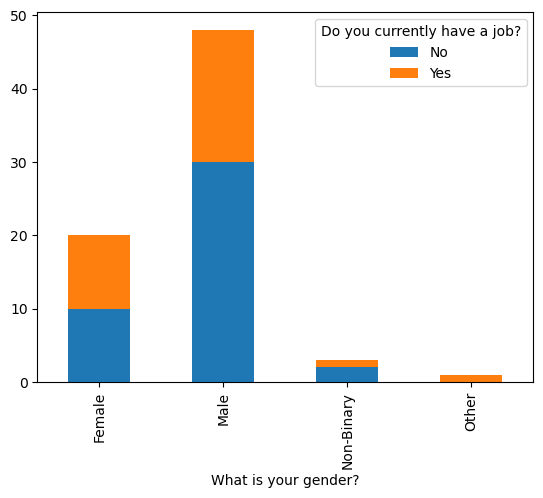

In [2]:
genderGroupingTable = pd.crosstab(cleaned_df['What is your gender?'], cleaned_df['Do you currently have a job?'])
genderGroupingTable.plot.bar(stacked = True)

For this anaylsis, we will simply count the number of individuals from each gender that have a job and those who don't. We will then display it in a stacked bar graph to see an accurate represnetaion of each genders job situation.

In this data we notice that an equal proportion of Male and Female students who participated in this survey have a job.

## 3.2 Students GPA in Relation to Job

<Axes: xlabel='Do you currently have a job?'>

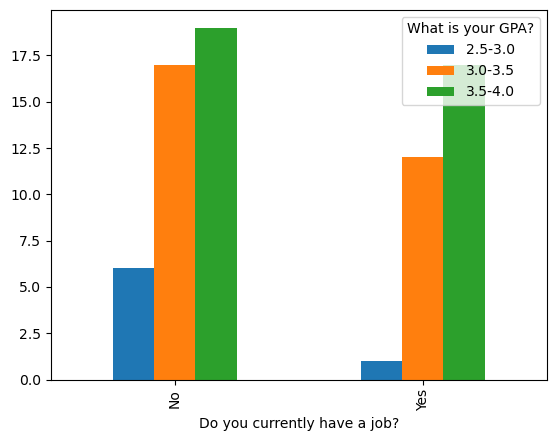

In [3]:
GPA_JobTable = pd.crosstab(cleaned_df['Do you currently have a job?'],cleaned_df['What is your GPA?'])
GPA_JobTable.plot.bar()

Explanation of what we did and what result we got

Kevin

## 3.3 Relationship between having a job and their satisfaction of GPA

Explanation of what we did and what result we got

Kevin

## 3.4 Relationship between having a job (hours they work), the amount they study and their GPA

In [4]:
#Muhammad

Explanation of what we did and what result we got

## 3.5 Relationship between GPA of working on campus and off campus

<Axes: xlabel='If you have a job, do you work on or off campus?'>

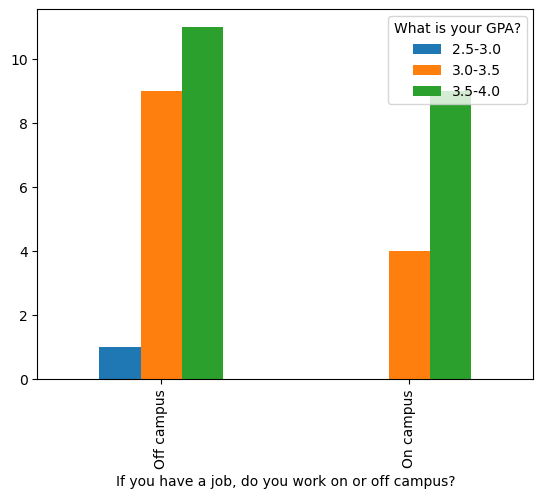

In [5]:
#zain
GPA_Campus = pd.crosstab(cleaned_df['If you have a job, do you work on or off campus?'],cleaned_df['What is your GPA?'])
GPA_Campus.plot.bar()

Explanation of what we did and what result we got

## 3.6 Relationship between having a job, amount of classes they take and their gpa

In [6]:
#Zian

Explanation of what we did and what result we got

## 3.7 more questions

In [7]:
#Zain

Explanation of what we did and what result we got

## 3.8 More Questions

In [8]:
#Zian

Explanation of what we did and what result we got

## 4.1 Hypothesis 1
**Insert Hypothesis here**

Explain the test being used

In [9]:
# Do test here
# I am udpating this on my branch lets see what happens

Explain Result of test

## 4.2 Hypothesis 2
**Insert Hypothesis here**

Explain the test being used

In [10]:
# Do test here
#Testing github push
#Testing again 

Explain Result of test

## 4.3 Hypothesis 3
**Insert Hypothesis here**

Explain the test being used

In [11]:
# Do test here

Explain Result of test

## 5. Conclusion
Write conclusion here